In [3]:
# Importar bibliotecas

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest # seleciona melhores features
from sklearn.preprocessing import MinMaxScaler # padronização dos dados
from sklearn import datasets, linear_model # modelo de regrassão linear
from sklearn.metrics import mean_squared_error, r2_score # medidas de desempenho
import matplotlib.pyplot as plt
%matplotlib inline

Importação e limpeza dos dados

In [129]:
df = pd.read_csv('ford.csv')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6


In [7]:
# Verifica se há dados nulos

df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17965 non-null  object 
 1   year          17965 non-null  int64  
 2   price         17965 non-null  int64  
 3   transmission  17965 non-null  object 
 4   mileage       17965 non-null  int64  
 5   fuelType      17965 non-null  object 
 6   tax           17965 non-null  int64  
 7   mpg           17965 non-null  float64
 8   engineSize    17965 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


Substituindo colunas object por int


In [130]:
# Feature model

lista_numeros = np.arange(start=1, stop=len(df['model'].unique())+1) # concertando erro: index 22 is out of bounds for axis 0 with size 22
indice=0

for modelo in df['model'].unique():
    df.model.replace({modelo:lista_numeros[indice]}, inplace=True)
    indice+=1

df['model'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23], dtype=int64)

In [131]:
# Feature transmission

lista_numeros = np.arange(start=1, stop=len(df['transmission'].unique())+1)
indice=0

for t in df['transmission'].unique():
    df.transmission.replace({t:lista_numeros[indice]}, inplace=True)
    indice+=1

df['transmission'].unique()

array([1, 2, 3], dtype=int64)

In [132]:
# Feature fueltype

lista_numeros = np.arange(start=1, stop=len(df['fuelType'].unique())+1)
indice=0

for f in df['fuelType'].unique():
    df.fuelType.replace({f:lista_numeros[indice]}, inplace=True)
    indice+=1

df['fuelType'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [71]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,1,2017,12000,1,15944,1,150,57.7,1.0
1,2,2018,14000,2,9083,1,150,57.7,1.0
2,2,2017,13000,2,12456,1,150,57.7,1.0
3,1,2019,17500,2,10460,1,145,40.3,1.5
4,1,2019,16500,1,1482,1,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17960,1,2016,7999,2,31348,1,125,54.3,1.2
17961,11,2017,8999,2,16700,1,150,47.1,1.4
17962,11,2014,7499,2,40700,1,30,57.7,1.0
17963,2,2015,9999,2,7010,2,20,67.3,1.6


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17965 non-null  int64  
 1   year          17965 non-null  int64  
 2   price         17965 non-null  int64  
 3   transmission  17965 non-null  int64  
 4   mileage       17965 non-null  int64  
 5   fuelType      17965 non-null  int64  
 6   tax           17965 non-null  int64  
 7   mpg           17965 non-null  float64
 8   engineSize    17965 non-null  float64
dtypes: float64(2), int64(7)
memory usage: 1.2 MB


Preparação dos dados para treino e teste

In [133]:
# Separa linhas para treino, teste e validação

qtd_linhas = len(df)
qtd_treino = qtd_linhas - 4491 #75%
qtd_teste = qtd_linhas - 180 #24%

linhas = (
    f'linhas treino = 0:{qtd_treino}'
    f' linhas teste = {qtd_treino}:{qtd_teste}'
    f' linhas validação = {qtd_teste}:{qtd_linhas}'
)

linhas

'linhas treino = 0:13474 linhas teste = 13474:17785 linhas validação = 17785:17965'

In [134]:
# Separar features e labels

features = df.drop('price', axis=1)
label = df['price']

In [135]:
# Escolher melhores features

features_list = ('model','year','transmission','mileage','fuelType','tax','mpg','engineSize')

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, label)
k_best_features_score = k_best_features.scores_

raw_pairs = zip(features_list[0:], k_best_features_score)
ordered_pairs = list(reversed(sorted(raw_pairs, key = lambda x: x[0])))
k_best_features_final = dict(ordered_pairs[:20])
best_features = k_best_features_final.keys()
print('')
print('Melhores features:')
print(k_best_features_final)


Melhores features:
{'year': 11.171195511038084, 'transmission': 1.4446006370314062, 'tax': 3.0555972429803524, 'mpg': 2.861968233433056, 'model': 1.9972204022971385, 'mileage': 5.842241620660775, 'fuelType': 1.5022727812461298, 'engineSize': 3.8362965478392543}


In [136]:
# Normalizando os dados de entrada

scaler = MinMaxScaler().fit(features)
features_scale = scaler.transform(features)

print('Features: ', features_scale.shape)
print(features_scale)

Features:  (17965, 8)
[[0.         0.328125   0.         ... 0.25862069 0.2038674  0.2       ]
 [0.04545455 0.34375    0.5        ... 0.25862069 0.2038674  0.2       ]
 [0.04545455 0.328125   0.5        ... 0.25862069 0.2038674  0.2       ]
 ...
 [0.45454545 0.28125    0.5        ... 0.05172414 0.2038674  0.2       ]
 [0.04545455 0.296875   0.5        ... 0.03448276 0.25690608 0.32      ]
 [0.63636364 0.34375    0.5        ... 0.25       0.2038674  0.24      ]]


In [137]:
# Separa os dados de treino, teste e validação

X_train = features_scale[:qtd_treino]
X_test = features_scale[qtd_treino:qtd_teste]

y_train = label[:qtd_treino]
y_test = label[qtd_treino:qtd_teste]

print( len(X_train), len(y_train))
print( len(X_test), len(y_test))


13474 13474
4311 4311


Modelo preditivo de Regressão Linear

In [138]:
# Treinamento usando regressão linear

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
predicao = lr.predict(X_test)
cd = r2_score(y_test, predicao)


f'Coeficiente de determinação:{cd * 100:.2f}'
#totas colunas = 56.72
#features = df[['year', 'mileage', 'tax', 'engineSize']] 50.26
#features = df[['year', 'mileage', 'tax']] 51.84


'Coeficiente de determinação:56.72'

In [160]:
# Validação

preco_real = df['price'][qtd_teste:qtd_linhas]

previsao = features_scale[qtd_teste:qtd_linhas]

pred = lr.predict(previsao)

index = np.arange(start=1, stop=len(previsao)+1)

df_resultado = pd.DataFrame({'preço real': preco_real, 'preço predito':pred, 'index':index})

df_resultado.set_index(index)

,preço real,preço predito,index
1,5500,4052.044500,1
2,12000,13647.333615,2
3,9000,11476.363836,3
4,16500,18054.628230,4
5,10500,10167.060897,5
...,...,...,...
176,7999,9614.393760,176
177,8999,13495.134705,177
178,7499,4745.699625,178
179,9999,11637.364357,179


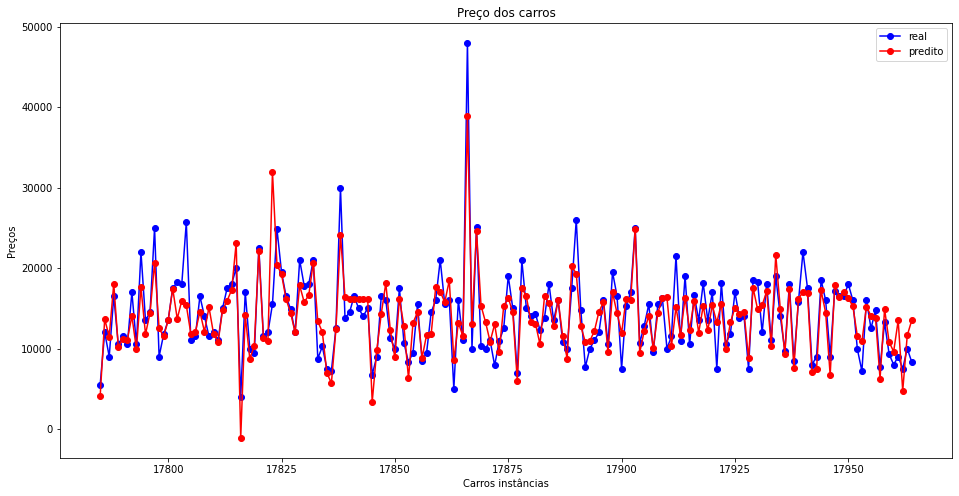

In [161]:
# Plotar gráfico

plt.figure(figsize=(16,8))
plt.title('Preço dos carros')
plt.plot(df_resultado['preço real'], label='real', color='blue', marker='o')
plt.plot(df_resultado['preço predito'], label='predito', color='red', marker='o')
plt.ylabel('Preços')
plt.xlabel('Carros instâncias')
leg = plt.legend()